In [5]:
# 导入相关的库
import numpy as np
import pandas as pd
from sklearn import linear_model

# 数据勘查

In [6]:
# 读取数据 - 波士顿房价数据集
data = pd.read_csv(r'../Datasets/boston.csv')

波士顿房价数据集字段说明
* CRIM 房屋所在镇的犯罪率
* ZN 面积大于25000平方英尺住宅所占的比例
* INDUS 房屋所在镇非零售区域所占比例
* CHAS 房屋是否位于河边，如果位于河边，则值为1，否则值为0.
* NOX 一氧化氮的浓度
* RM 平均房间数量
* AGE 1940年前建成房屋所占的比例
* DIS 房屋距离波士顿五大就业中心的加权距离
* RAD 距离房屋最近的公路
* TAX 财产税额度
* PTRATIO 房屋所在镇师生比例
* B 计算公式： 1000 * （房屋所在镇非美籍人口所在比例 - 0.63） ** 2
* LSTAT 弱势群体人口所占比例
* MEDV 房屋的平均价格

In [7]:
# 查看数据的基本信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
# 查看数据是否有重复值
data.duplicated().any()

False

In [9]:
# 前五条数据
# data.head()

# 最后五条数据
# data.tail()

# 随机5条数据
data.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
155,3.53501,0.0,19.58,1.0,0.871,6.152,82.6,1.7455,5.0,403.0,14.7,88.01,15.02,15.6
249,0.19073,22.0,5.86,0.0,0.431,6.718,17.5,7.8265,7.0,330.0,19.1,393.74,6.56,26.2
443,9.96654,0.0,18.10,0.0,0.740,6.485,100.0,1.9784,24.0,666.0,20.2,386.73,18.85,15.4
246,0.33983,22.0,5.86,0.0,0.431,6.108,34.9,8.0555,7.0,330.0,19.1,390.18,9.16,24.3
161,1.46336,0.0,19.58,0.0,0.605,7.489,90.8,1.9709,5.0,403.0,14.7,374.43,1.73,50.0


# 模型训练

In [10]:
# 构建数据集
d = data.sample(len(data), random_state=0)

# 取前400条数据作为训练集
train_X = d.iloc[:400, :-1]  # 特征
train_y = d.iloc[:400, -1]  # 结果

# 取剩余条数的数据为测试集
test_X = d.iloc[400:, :-1]
test_y = d.iloc[400:, -1]

In [11]:
# 调库 - 创建线性回归模型
regr = linear_model.LinearRegression()

In [25]:
# 模型参数
regr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [12]:
# 训练 - 用训练集训练模型
regr.fit(train_X, train_y)

LinearRegression()

In [24]:
# 模型评估得分
regr.score(train_X, train_y)

0.7052575849187255

In [22]:
# 回归系数，即权重
regr.coef_

array([-1.09547194e-01,  4.10831831e-02,  1.18301009e-02,  2.03476430e+00,
       -1.95745194e+01,  3.28214790e+00,  6.97061145e-03, -1.39788591e+00,
        3.77818627e-01, -1.54858651e-02, -8.65309243e-01,  8.40572928e-03,
       -5.67832943e-01])

In [23]:
# 截距
regr.intercept_

40.09459950747112

In [18]:
# 预测 - 用训练得到的模型进行预测
predict_y = regr.predict(test_X)

#查看预测结果
predict_y

array([35.34647338, 32.55720266,  8.40630514, 10.76060958, 22.40297205,
       34.57337683, 18.84414799, 19.05167211, 15.26567321, 26.19586657,
       39.69151418, 25.57492829, 41.1927093 , 25.15029906, 22.62643044,
       10.66102304, 12.54928069, 14.90709068, 18.91134767,  3.65090209,
       27.59736901, 26.43467447, 39.51788269, 20.6344755 , 21.66628414,
       34.30541184, 33.10635959, 10.11723643, 25.39010326, 41.80770368,
       17.22263143, 18.49689376, 25.64747971, 18.75291341,  6.55078142,
       20.42634518, 34.56041209, 16.53924922, 23.30148353, 14.4497758 ,
       24.49513488, 19.60529666, 17.76989718, 18.36261218, 33.50023364,
       19.90181694, 31.64084077, 34.19152519, 39.78055211, 17.58064129,
       17.41894961, 35.9080134 , 18.64925747,  8.83670164, 14.8995962 ,
       25.1838175 , 20.46579876, 17.08707916, 27.58383071, 13.38668501,
        6.29561152, 19.77963926,  7.26301219, 27.08986683,  2.26193311,
       29.44926487, 32.02811378, 22.92972986, 17.47297859, 18.71

# 模型评估

在回归任务（对连续值的预测）中，常见的评估指标（Metric）有：

- 平均绝对误差 MAE: Mean Absolute Error
- 均方误差 MSE: Mean Square Error
- 均方根误差 RMSE: Root Mean Square Error
- 平均绝对百分比误差 MAPE: Mean Absolute Percentage Error

常用的有MAE和MSE

### 平均绝对误差 MAE
MAE用来衡量预测值和真实值之间的平均绝对误差，MAE越小表示模型越好
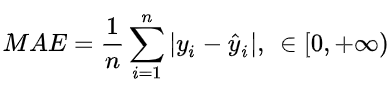

### 均方误差 MSE
即是线性回归的目标函数，也可以作为评估指标，越小越好
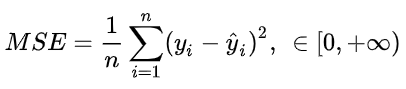

### 均方根误差 RMSE
RMSE是在MSE的基础上开根号而来，越小越好
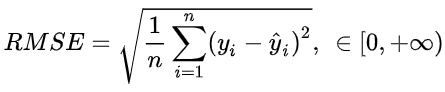

### 平均绝对百分比误差 MAPE
MAPE和MAE类似，是在MAE的基础上做了标准化处理，越小越好
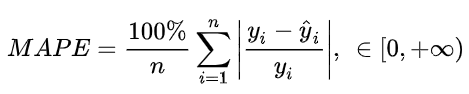

In [19]:
print('模型评估\n')
print('平均绝对误差MAE: ', np.mean(np.abs(test_y - predict_y)))
print('均方误差MSE: ', np.mean((test_y - predict_y) ** 2))
print('均方根误差RMSE: ', np.sqrt(np.mean((test_y - predict_y) ** 2)))
print('平均绝对百分比误差MAPE: ', np.mean(np.abs((test_y - predict_y) / test_y)))

模型评估

平均绝对误差MAE:  3.065618274706893
均方误差MSE:  17.101003508572095
均方根误差RMSE:  4.135335960786269
平均绝对百分比误差MAPE:  0.14895655956639176


# 数据可视化

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'SimHei'
mpl.rcParams['axes.unicode_minus'] = False

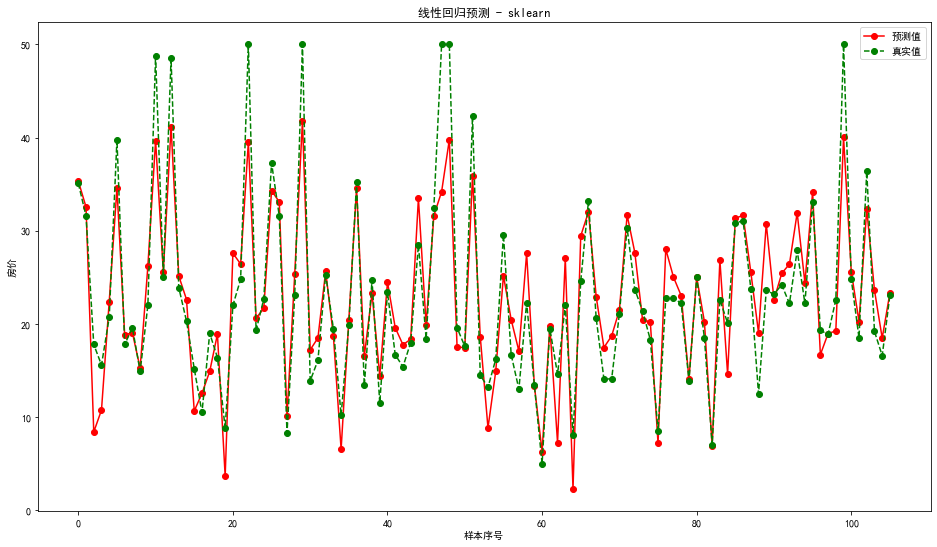

In [21]:
# 指定绘图大小
plt.figure(figsize=(16,9))

# 绘制预测值
plt.plot(predict_y, 'ro-', label='预测值')

# 绘制真实值
plt.plot(test_y.values, 'go--', label='真实值')

# 绘图
plt.title('线性回归预测 - sklearn')
plt.xlabel('样本序号')
plt.ylabel('房价')
plt.legend()
plt.show()